## 各種ライブラリをインポート

In [172]:
import numpy as np
# from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import random
import math

In [173]:
# データをロード
training_acc = np.array(np.loadtxt('data/training_acc.txt', dtype='float64'))
training_dis = np.array(np.loadtxt('data/training_dis.txt', dtype='float64'))

print(training_acc.shape)
print(training_acc)
print(training_dis.shape)
print(training_dis)

(265, 90)
[[ 0.     0.134  0.089 ...  2.405  3.608 -7.84 ]
 [ 2.405  3.564 -7.885 ...  2.405  3.653 -7.751]
 [ 2.45   3.608 -7.795 ...  2.45   3.564 -7.662]
 ...
 [ 8.33   0.624  0.178 ... -0.267  1.203  0.089]
 [-0.223  1.559 -0.49  ... -4.187  5.657 -7.484]
 [ 0.757  6.593  0.045 ...  0.223  1.069  2.539]]
(265,)
[0.  2.9 4.4 2.1 2.2 1.9 2.3 3.6 0.  2.6 2.4 2.3 2.  3.2 1.6 2.8 2.2 4.5
 5.  1.6 1.9 1.4 2.3 1.1 1.1 2.  2.5 3.  1.  0.  0.2 0.7 1.1 2.  2.8 1.9
 3.9 2.6 2.5 0.5 1.2 2.  3.  1.9 1.8 1.6 0.2 0.  0.  2.2 2.4 1.  2.  3.
 1.7 2.5 1.4 1.4 2.6 2.  2.8 2.8 2.2 4.8 0.  2.1 0.  1.  2.6 2.4 2.1 2.
 2.8 2.7 1.5 1.9 1.3 3.  2.9 2.3 2.4 2.5 0.  0.1 1.2 4.  4.  1.9 2.  1.8
 3.1 1.5 0.  2.8 2.1 2.5 1.2 1.5 1.5 2.3 2.2 0.  0.  3.3 1.7 0.  0.6 0.9
 1.8 1.  1.1 1.5 1.3 1.  1.2 1.1 1.4 1.9 1.  1.6 1.6 2.2 1.8 2.  2.4 2.7
 2.1 3.9 4.2 4.9 3.8 3.2 3.1 1.2 2.2 2.7 1.3 1.6 1.  0.2 1.  1.9 2.2 3.4
 2.3 0.8 1.1 1.6 3.8 1.7 1.1 2.6 3.4 0.8 1.  3.4 3.6 1.1 1.3 2.3 2.4 0.6
 0.  0.  0.  0.  2.4 3.1 0. 

## 活性化関数の定義
### sigmoid, softmax, tanh関数とそれらの微分を宣言している。

In [174]:
# sigmoid function
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

# derivative of sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

# softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

# derivative of softmax function
def softmax_prime(x):
    return softmax(x) * (1 - softmax(x))

# tanh function
def tanh(x):
  return (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))

def tanh_prime(x):
  return 4 / (np.exp(x)+np.exp(-x))**2

## Layerの定義
### 初期層、中間層、出力層でクラスが分けられているが全てにおいて、<br>layer = *_layer(入力次元数, 出力次元数, 学習率（指定しないと0.03）)のように宣言する。<br>逆伝播、順伝播の場合はそれぞれlayer.forward(...)、layer.backward(...)のようにする。

In [175]:
# ######################################最初の層についてのクラス###########################################
# class start_layer(object):
#     # initation
#     def  __init__(self, input_dim, output_dim, learning_rate=0.03):
#         self.input_dim = input_dim # 入力次元
#         self.output_dim = output_dim #出力次元
#         self.learning_rate = learning_rate #学習率(0.005 ~ 0.1)
#         self.weight = np.random.normal(np.sqrt(1.0/input_dim), size=(output_dim, input_dim)).astype(np.float64) #重みを決定
#         self.bias = np.zeros((1, output_dim), dtype=np.float64) #バイアス項
        
#     # 順伝播
#     def forward(self,x):
#         # x_h ... input_dim次元の(縦)ベクトル
#         self.input_x = np.array(x).reshape(self.input_dim)
        
#         # u_i ... output_dim次元の(縦)ベクトルを出力
#         self.output_u = (np.dot(self.weight, self.input_x)).reshape(self.output_dim) 
        
#         # x_i ... output_dim次元の(縦)ベクトルを出力 (sigmoidを作用させる)
#         self.output_x = sigmoid(self.output_u).reshape(self.output_dim)
        
#         # u_i が 出力
#         return self.output_u
    
#     # 逆伝播
#     def backward(self,delta):# delta = δ_i
#         # W = W - η .* (δ_i * x_h.T) ... (output_dim　×　nput_dim)次元の配列
#         self.weight = self.weight - self.learning_rate * np.dot(delta.reshape(self.output_dim,1), self.input_x.reshape(1, self.input_dim))
#         return
#  #################################################################################################


# ######################################  中間層についてのクラス  ###########################################
# class mid_layer(object):
#     # initation
#     def  __init__(self, input_dim, output_dim, learning_rate=0.03):
#         self.input_dim = input_dim # 入力次元
#         self.output_dim = output_dim #出力次元
#         self.learning_rate = learning_rate #学習率(0.005 ~ 0.1)
#         self.weight = np.random.normal(np.sqrt(1.0/input_dim), size=(output_dim, input_dim)).astype(np.float64) #重みを決定
#         self.bias = np.zeros((1, output_dim), dtype=np.float64) #バイアス項
        
#     # 順伝播   
#     def forward(self,u):# u = u_i
        
#         # u_i ... input_dim次元の(縦)ベクトル
#         self.input_u = np.array(u).reshape(self.input_dim)
        
#         # x_i ... input_dim次元の(縦)ベクトル
#         self.input_x = sigmoid(self.input_u).reshape(self.input_dim) 
        
#         # u_j ... output_dim次元の(縦)ベクトルを出力
#         self.output_u = (np.dot(self.weight, self.input_x)).reshape(self.output_dim)
        
#         # x_j ... output_dim次元の(縦)ベクトルを出力
#         self.output_x = sigmoid(self.output_u).reshape(self.output_dim)
        
#         # u_j が 出力
#         return self.output_u
    
#     # 逆伝播
#     def backward(self, delta):# delta = δ_j
        
#         # W = W - η .* (δ_j * x_i.T) ... (output_dim　×　nput_dim)次元の配列
#         self.weight = self.weight - self.learning_rate * np.dot(delta.reshape(self.output_dim,1), self.input_x.reshape(1, self.input_dim))
        
#         # δ_i = (W_ji.T *  δ_j) .* f'(u_i) ... input_dim次元の(縦)ベクトル
#         return (np.dot(self.weight.T, delta) * sigmoid_prime(self.input_u)).reshape(self.input_dim)
# #################################################################################################

    
# ######################################  中間層についてのクラス  ###########################################    
# class last_layer(object):
    
#     def  __init__(self, input_dim, output_dim, learning_rate=0.03):
#         self.input_dim = input_dim # 入力次元
#         self.output_dim = output_dim#出力次元
#         self.learning_rate = learning_rate #学習率(0.005 ~ 0.1)
#         self.weight = np.random.normal(np.sqrt(1.0/input_dim), size=(output_dim, input_dim)).astype(np.float64) #重みを決定
#         self.bias = np.zeros((1, output_dim), dtype=np.float64) #バイアス項
        
#     # 順伝播    
#     def forward(self,u):# u = u_j
        
#         # u_j ... input_dim次元の(縦)ベクトル
#         self.input_u = np.array(u).reshape(self.input_dim) 
        
#         # x_j ... input_dim次元の(縦)ベクトル
#         self.input_x = sigmoid(self.input_u).reshape(self.input_dim)
        
#         # u_k ... output_dim次元の(縦)ベクトルを出力
#         self.output_u = (np.dot(self.weight, self.input_x)).reshape(self.output_dim)
        
#         # x_k ... output_dim次元の(縦)ベクトルを出力
#         self.output_x = softmax(self.output_u).reshape(self.output_dim)
        
#         # x_k が最終結果
#         return self.output_x
    
#     # 逆伝播
#     def backward(self,loss):# loss = y - y^p
        
#         # δ_k = loss * f'(u_k) ... output_dim次元の(縦)ベクトルを出力
#         self.delta = (loss * softmax_prime(self.output_u)).reshape(self.output_dim)
        
#         # W = W - η .* (δ_k * x_j.T) ... (output_dim　×　nput_dim)次元の配列
#         self.weight = self.weight - self.learning_rate * np.dot(self.delta.reshape(self.output_dim,1), self.input_x.reshape(1,self.input_dim))
#         #print("gradient = {}".format(np.dot(self.delta.reshape(self.output_dim,1), self.input_x.reshape(1,self.input_dim))))
        
#         #  δ_j = (W_kj.T *  δ_k) .* f'(u_j) ... input_dim次元の(縦)ベクトル
#         return ( np.dot(self.weight.T, self.delta) * sigmoid_prime(self.input_u) ).reshape(self.input_dim)
# #################################################################################################

######################################最初の層についてのクラス###########################################
class start_layer(object):
    # initation
    def  __init__(self, input_dim, output_dim, learning_rate=0.03):
        self.input_dim = input_dim # 入力次元
        self.output_dim = output_dim #出力次元
        self.learning_rate = learning_rate #学習率(0.005 ~ 0.1)
        self.weight = np.random.normal(np.sqrt(1.0/input_dim), size=(output_dim, input_dim)).astype(np.float32) #重みを決定
        self.bias = np.zeros((1, output_dim), dtype=np.float32) #バイアス項
        
    # 順伝播
    def forward(self,x):
        # x_h ... input_dim次元の(縦)ベクトル
        self.input_x = np.array(x).reshape(self.input_dim)
        
        # u_i ... output_dim次元の(縦)ベクトルを出力
        self.output_u = (np.dot(self.weight, self.input_x)).reshape(self.output_dim) 
        
        # x_i ... output_dim次元の(縦)ベクトルを出力 (sigmoidを作用させる)
        self.output_x = sigmoid(self.output_u).reshape(self.output_dim)
        
        # u_i が 出力
        return self.output_u
    
    # 逆伝播
    def backward(self,delta):# delta = δ_i
        # W = W - η .* (δ_i * x_h.T) ... (output_dim　×　nput_dim)次元の配列
        self.weight = self.weight - self.learning_rate * np.dot(delta.reshape(self.output_dim,1), self.input_x.reshape(1, self.input_dim))
        return
 #################################################################################################


######################################  中間層についてのクラス  ###########################################
class mid_layer(object):
    # initation
    def  __init__(self, input_dim, output_dim, learning_rate=0.03):
        self.input_dim = input_dim # 入力次元
        self.output_dim = output_dim #出力次元
        self.learning_rate = learning_rate #学習率(0.005 ~ 0.1)
        self.weight = np.random.normal(np.sqrt(1.0/input_dim), size=(output_dim, input_dim)).astype(np.float32) #重みを決定
        self.bias = np.zeros((1, output_dim), dtype=np.float32) #バイアス項
        
    # 順伝播   
    def forward(self,u):# u = u_i
        
        # u_i ... input_dim次元の(縦)ベクトル
        self.input_u = np.array(u).reshape(self.input_dim)
        
        # x_i ... input_dim次元の(縦)ベクトル
        self.input_x = sigmoid(self.input_u).reshape(self.input_dim) 
        
        # u_j ... output_dim次元の(縦)ベクトルを出力
        self.output_u = (np.dot(self.weight, self.input_x)).reshape(self.output_dim)
        
        # x_j ... output_dim次元の(縦)ベクトルを出力
        self.output_x = sigmoid(self.output_u).reshape(self.output_dim)
        
        # u_j が 出力
        return self.output_u
    
    # 逆伝播
    def backward(self, delta):# delta = δ_j
        
        # W = W - η .* (δ_j * x_i.T) ... (output_dim　×　nput_dim)次元の配列
        self.weight = self.weight - self.learning_rate * np.dot(delta.reshape(self.output_dim,1), self.input_x.reshape(1, self.input_dim))
        
        # δ_i = (W_ji.T *  δ_j) .* f'(u_i) ... input_dim次元の(縦)ベクトル
        return (np.dot(self.weight.T, delta) * sigmoid_prime(self.input_u)).reshape(self.input_dim)
#################################################################################################

    
######################################  中間層についてのクラス  ###########################################    
class last_layer(object):
    
    def  __init__(self, input_dim, output_dim, learning_rate=0.03):
        self.input_dim = input_dim # 入力次元
        self.output_dim = output_dim#出力次元
        self.learning_rate = learning_rate #学習率(0.005 ~ 0.1)
        self.weight = np.random.normal(np.sqrt(1.0/input_dim), size=(output_dim, input_dim)).astype(np.float32) #重みを決定
        self.bias = np.zeros((1, output_dim), dtype=np.float32) #バイアス項
        
    # 順伝播    
    def forward(self,u):# u = u_j
        
        # u_j ... input_dim次元の(縦)ベクトル
        self.input_u = np.array(u).reshape(self.input_dim) 
        
        # x_j ... input_dim次元の(縦)ベクトル
        self.input_x = sigmoid(self.input_u).reshape(self.input_dim)
        
        # u_k ... output_dim次元の(縦)ベクトルを出力
        self.output_u = (np.dot(self.weight, self.input_x)).reshape(self.output_dim)
        
        # x_k ... output_dim次元の(縦)ベクトルを出力
        self.output_x = sigmoid(self.output_u).reshape(self.output_dim)
        
        # x_k が最終結果
        return self.output_x
    
    # 逆伝播
    def backward(self,loss):# loss = y - y^p
        
        # δ_k = loss * f'(u_k) ... output_dim次元の(縦)ベクトルを出力
        self.delta = (loss * sigmoid_prime(self.output_u)).reshape(self.output_dim)
        
        # W = W - η .* (δ_k * x_j.T) ... (output_dim　×　nput_dim)次元の配列
        self.weight = self.weight - self.learning_rate * np.dot(self.delta.reshape(self.output_dim,1), self.input_x.reshape(1,self.input_dim))
        #print("gradient = {}".format(np.dot(self.delta.reshape(self.output_dim,1), self.input_x.reshape(1,self.input_dim))))
        
        #  δ_j = (W_kj.T *  δ_k) .* f'(u_j) ... input_dim次元の(縦)ベクトル
        return ( np.dot(self.weight.T, self.delta) * sigmoid_prime(self.input_u) ).reshape(self.input_dim)
#################################################################################################

## 3層用ニューラルネットの定義

In [176]:
def nn_3(first_layer=90, second_layer=60, third_layer=1, learning_rate=0.01, epoch_number=500, train_number=500, test_number = 100):
    lay_1 = start_layer(first_layer, second_layer, learning_rate)
    lay_2 = last_layer(second_layer, third_layer, learning_rate)

    np.set_printoptions(precision=3)
    accuracy_list = []
    epoch_list = []
    loop = 0
    epoch_number = epoch_number#200
    train_number = train_number#500
    test_number = test_number#100

    for epoch in range(0,epoch_number): 
        for i in range(0,train_number):
            random_train_index = random.randint(0,training_acc.shape[0]-1)
            #順伝播
            output = lay_1.forward(training_acc[random_train_index].reshape(first_layer))
            output = lay_2.forward(output)

            #逆伝播
            correct_answer = training_dis[random_train_index]
            loss = output - correct_answer/5
            delta = lay_2.backward(loss)
            delta = lay_1.backward(delta)

        #テストデータで正答率をチェック
        count = 0
        for j in range(0,test_number):
            random_test_index = random.randint(0,training_acc.shape[0]-1)
            output = lay_1.forward(training_acc[random_test_index].reshape(first_layer))
            output = lay_2.forward(output)
    
            #print("output = {}".format(output))
            #print("prediction = {} <---> test_labels = {}.".format(np.argmax(output), test_labels[random_test_index]))

            count += float(training_dis[random_test_index] - 5 * output)

        loop += 1
        #print("#",end="")
        print("\t{:2.0f} / {} finished.  accuracy = {:2.5f}".format(loop, epoch_number, count/test_number))
        epoch_list.append(epoch)
        accuracy_list.append(count/test_number)

    print("\t finished")
    return epoch_list, accuracy_list, lay_1, lay_2

In [177]:
epoch, step_diff, lay1, lay2= nn_3()

	 1 / 500 finished.  accuracy = -2.91959
	 2 / 500 finished.  accuracy = -2.85527
	 3 / 500 finished.  accuracy = -2.80599
	 4 / 500 finished.  accuracy = -2.52509
	 5 / 500 finished.  accuracy = -2.25889
	 6 / 500 finished.  accuracy = -2.50379
	 7 / 500 finished.  accuracy = -2.15931
	 8 / 500 finished.  accuracy = -1.64486
	 9 / 500 finished.  accuracy = -1.96095
	10 / 500 finished.  accuracy = -1.40562
	11 / 500 finished.  accuracy = -0.54334
	12 / 500 finished.  accuracy = -0.22811
	13 / 500 finished.  accuracy = 0.17761
	14 / 500 finished.  accuracy = 0.51769
	15 / 500 finished.  accuracy = 0.58522
	16 / 500 finished.  accuracy = 0.91357
	17 / 500 finished.  accuracy = 0.74317
	18 / 500 finished.  accuracy = 0.84312
	19 / 500 finished.  accuracy = 0.78079
	20 / 500 finished.  accuracy = 0.67628
	21 / 500 finished.  accuracy = 0.61305
	22 / 500 finished.  accuracy = 0.83462
	23 / 500 finished.  accuracy = 0.80302
	24 / 500 finished.  accuracy = 0.80729
	25 / 500 finished.  accurac

	207 / 500 finished.  accuracy = 0.14088
	208 / 500 finished.  accuracy = 0.03531
	209 / 500 finished.  accuracy = 0.05252
	210 / 500 finished.  accuracy = 0.21948
	211 / 500 finished.  accuracy = 0.10122
	212 / 500 finished.  accuracy = 0.26305
	213 / 500 finished.  accuracy = 0.04080
	214 / 500 finished.  accuracy = -0.00256
	215 / 500 finished.  accuracy = 0.28616
	216 / 500 finished.  accuracy = 0.23317
	217 / 500 finished.  accuracy = 0.27193
	218 / 500 finished.  accuracy = 0.13512
	219 / 500 finished.  accuracy = -0.00482
	220 / 500 finished.  accuracy = 0.17274
	221 / 500 finished.  accuracy = 0.09005
	222 / 500 finished.  accuracy = -0.02116
	223 / 500 finished.  accuracy = 0.20464
	224 / 500 finished.  accuracy = 0.11403
	225 / 500 finished.  accuracy = 0.13509
	226 / 500 finished.  accuracy = 0.13471
	227 / 500 finished.  accuracy = 0.08953
	228 / 500 finished.  accuracy = 0.04094
	229 / 500 finished.  accuracy = -0.03765
	230 / 500 finished.  accuracy = 0.03938
	231 / 500 f

	410 / 500 finished.  accuracy = -0.00472
	411 / 500 finished.  accuracy = -0.00237
	412 / 500 finished.  accuracy = -0.05481
	413 / 500 finished.  accuracy = 0.00570
	414 / 500 finished.  accuracy = -0.08568
	415 / 500 finished.  accuracy = -0.06170
	416 / 500 finished.  accuracy = 0.01490
	417 / 500 finished.  accuracy = -0.02668
	418 / 500 finished.  accuracy = -0.06617
	419 / 500 finished.  accuracy = -0.03774
	420 / 500 finished.  accuracy = 0.09446
	421 / 500 finished.  accuracy = -0.01206
	422 / 500 finished.  accuracy = -0.05029
	423 / 500 finished.  accuracy = -0.01723
	424 / 500 finished.  accuracy = -0.08348
	425 / 500 finished.  accuracy = -0.01652
	426 / 500 finished.  accuracy = 0.02395
	427 / 500 finished.  accuracy = 0.02009
	428 / 500 finished.  accuracy = -0.03668
	429 / 500 finished.  accuracy = 0.10520
	430 / 500 finished.  accuracy = 0.04616
	431 / 500 finished.  accuracy = -0.04664
	432 / 500 finished.  accuracy = -0.18063
	433 / 500 finished.  accuracy = 0.01775


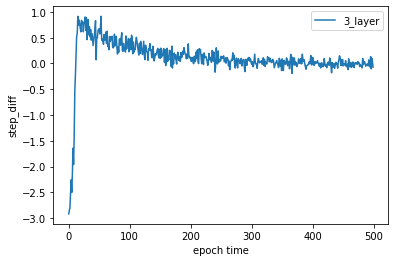

In [178]:
plt.plot(epoch, step_diff,label="3_layer")

plt.xlabel("epoch time")
plt.ylabel("step_diff")
plt.legend()
plt.show()
#plt.savefig("../report/5-2-1.png")

In [179]:
#保存
np.savetxt("data/w1.txt",lay1.weight, delimiter=' ', fmt='%f')
np.savetxt("data/w2.txt",lay2.weight, delimiter=' ', fmt='%f')

In [180]:
w = np.array(np.loadtxt('data/w1.txt', dtype='float32'))

print("w = \n", w)
print("\nlay1.weight = \n",lay1.weight)
print("\nw == lay.weight ?\n",w==lay1.weight)

if np.all(w==lay1.weight):
  print("\nYEAH")
else:
  print("\nOh, my Gosh")

w = 
 [[-1.378e+00 -1.410e+00 -1.396e+00 ... -1.113e+00  9.707e-02  5.756e-01]
 [ 9.044e-01  2.232e-02  6.374e-01 ... -5.528e-02 -3.337e-03 -1.287e+00]
 [ 2.247e-01 -4.480e-04  2.043e-01 ...  6.042e-01 -1.348e-01 -6.033e-01]
 ...
 [ 9.286e-01 -2.318e-01 -3.670e-01 ...  1.030e+00 -8.722e-02  6.839e-01]
 [-8.881e-01  3.691e-01 -4.856e-01 ... -9.008e-01  1.756e+00 -1.029e+00]
 [ 1.231e-01  2.417e+00 -3.811e-01 ...  3.347e-01  1.196e-01 -6.432e-01]]

lay1.weight = 
 [[-1.378e+00 -1.410e+00 -1.396e+00 ... -1.113e+00  9.707e-02  5.756e-01]
 [ 9.044e-01  2.232e-02  6.374e-01 ... -5.528e-02 -3.337e-03 -1.287e+00]
 [ 2.247e-01 -4.484e-04  2.043e-01 ...  6.042e-01 -1.349e-01 -6.033e-01]
 ...
 [ 9.286e-01 -2.318e-01 -3.670e-01 ...  1.030e+00 -8.723e-02  6.839e-01]
 [-8.881e-01  3.691e-01 -4.856e-01 ... -9.008e-01  1.756e+00 -1.029e+00]
 [ 1.231e-01  2.417e+00 -3.811e-01 ...  3.347e-01  1.196e-01 -6.432e-01]]

w == lay.weight ?
 [[False False False ... False False False]
 [False False False ... Fa

In [171]:
acc_array = np.zeros(3)
output = lay1.forward(acc_array.reshape(3))
output = lay2.forward(output)
print("output = ",float(output))

output =  0.6383301476068869


In [169]:
lay1 = start_layer(3,3)
lay2 = last_layer(3,1)
for i in range(0,10000):
    #順伝播
    output = lay1.forward([1,1,3])
    output = lay2.forward(output)
    #逆伝播
    correct_answer = np.array([3])
    loss = output - correct_answer/5
    delta = lay2.backward(loss)
    delta = lay1.backward(delta)
output = lay1.forward([1,1,3])
output = lay2.forward(output)
print(output*5)

[3.]
